# Problem Statemet

The desired outcome is to create a predictive model for Fraud Detection in Insurance Claims using data that was sourced from insurance providers. Using machine learning I aim to identify patterns that will distinguish between fraudulent and non-fraudulent claims. This will help the insurance company reduce losses, increase revenue and profitability and also improve effiency in insurance claims. 

These insurance providers comprise of a vast array of insurance types.

# 1. Importing packages

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string

# 2. Loading Data

In [2]:
df_insurance = pd.read_csv(r'C:\Users\sibah\OneDrive\Documents\GitHub\Integrated-project-\insurance_claims.csv')

# 3. Exploratory Data Analysis (EDA)

In [3]:
# look at data statistics
df_insurance.head().T

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48.0,42.0,29.0,41.0,44.0
policy_number,521585,342868,687698,227811,367455
policy_bind_date,2014-10-17,2006-06-27,2000-09-06,1990-05-25,2014-06-06
policy_state,OH,IN,OH,IL,IL
policy_csl,250/500,250/500,100/300,250/500,500/1000
policy_deductable,1000.0,2000.0,2000.0,2000.0,1000.0
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_zip,466132,468176,430632,608117,610706


* I noticed that some of the values in the columns are represente by '?'. I will replace all these values with NaN as they clearly fall under missing values. 

In [4]:
df_insurance.replace('?', np.nan, inplace = True)

In [5]:
# look at descriptive data statistics
df_insurance.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,998.000000,1000.000000,998.000000,997.000000,1.000000e+03,1000.000000,998.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,996.000000,999.000000,999.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.962926,546238.648000,1134.268537,1257.001113,1.101000e+06,501214.488000,25176.452906,-26793.700000,11.644000,1.83900,0.992000,1.487000,52767.469880,7434.944945,7398.628629,37928.950000,2005.103000,NaN
std,115.113174,9.135425,257063.005276,611.251914,244.265051,2.297407e+06,71701.610941,27877.379027,28104.096686,6.951373,1.01888,0.820127,1.111335,26405.348039,4883.158265,4827.050887,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1090.320000,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.500000,4290.000000,4440.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.830000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,57935.000000,6780.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.740000,0.000000e+00,603251.000000,51075.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70620.000000,11310.000000,10890.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
# look at data colums to see all the available columns
df_insurance.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
# look at data statistics
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          998 non-null    float64
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            998 non-null    float64
 7   policy_annual_premium        997 non-null    float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      999 non-null    object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
# look at data to see missing values
df_insurance.isnull().sum()

months_as_customer                0
age                               2
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 2
policy_annual_premium             3
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           1
insured_occupation                0
insured_hobbies                   2
insured_relationship              0
capital-gains                     2
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             2
incident_state                    2
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

## Data cleaning

### Handle missing values

* The _c39 column has 1000 missing values, which is 100% of values in that column. Therefore, I will drop the column as it plays no significant role. 

For the following I will using the Mean/Median/Mode Imputation to fill the missing values depending on the type of data in the column. (I could have easily dropped the rows as the missing values are relatively few)
* age has 2 missing values
* policy_deductable has 2 missing values
* policy_annual_premium has 3 missing values
* insured_education_level has 1 missing value
* insured_hobbies has 2 missing values
* capital-gains has 2 missing values
* collision_type has 178 missing values
* authorities_contacted has 2 missing values
* incident_state has 2 missing values
* property_damage has 360 missing values.
* police_report_available has 343 missing values
* total_claim_amount has 4 missing values
* injury_claim has 1 missing value
* property_claim has 1 missing value



In [9]:
# drop the column
#df_insurance = df_insurance.drop('_c39', axis = 1)

#Replace missing values with the mean, median, or mode of the column.
df_insurance['age'].fillna(df_insurance['age'].mean(), inplace = True)
df_insurance['policy_deductable'].fillna(df_insurance['policy_deductable'].mean(), inplace = True)
df_insurance['policy_annual_premium'].fillna(df_insurance['policy_annual_premium'].mean(), inplace = True)
df_insurance['insured_education_level'].fillna(df_insurance['insured_education_level'].mode()[0], inplace = True)
df_insurance['insured_hobbies'].fillna(df_insurance['insured_hobbies'].mode()[0], inplace = True)
df_insurance['capital-gains'].fillna(df_insurance['capital-gains'].mean(), inplace = True)
df_insurance['collision_type'].fillna(df_insurance['collision_type'].mode()[0], inplace = True)
df_insurance['authorities_contacted'].fillna(df_insurance['authorities_contacted'].mode()[0], inplace = True)
df_insurance['incident_state'].fillna(df_insurance['incident_state'].mode()[0], inplace = True)
df_insurance['property_damage'].fillna(df_insurance['property_damage'].mode()[0], inplace = True)
df_insurance['police_report_available'].fillna(df_insurance['police_report_available'].mode()[0], inplace = True)
df_insurance['total_claim_amount'].fillna(df_insurance['total_claim_amount'].mean(), inplace = True)
df_insurance['injury_claim'].fillna(df_insurance['injury_claim'].mean(), inplace = True)
df_insurance['property_claim'].fillna(df_insurance['property_claim'].mean(), inplace = True)


In [10]:
df_insurance.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,2,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,0,NO,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,3,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,2,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,1,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N


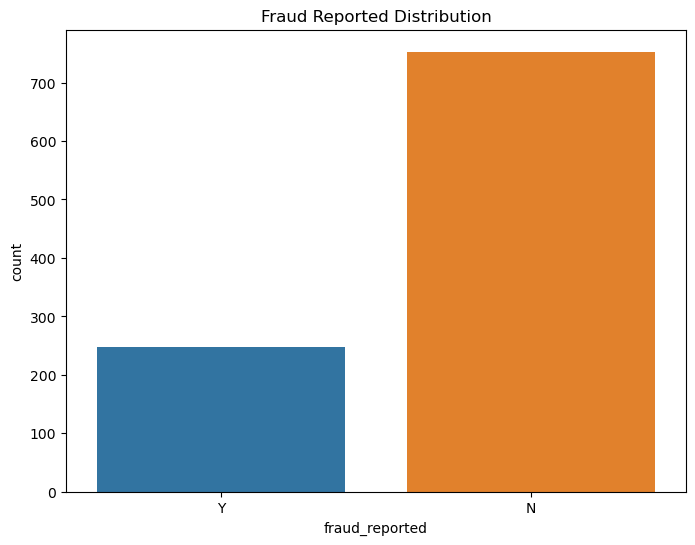

In [13]:
# Visualize the distribution of the target variable 'fraud_reported'
plt.figure(figsize=(8, 6))
sns.countplot(x='fraud_reported', data=df_insurance)
plt.title('Fraud Reported Distribution')
plt.show()



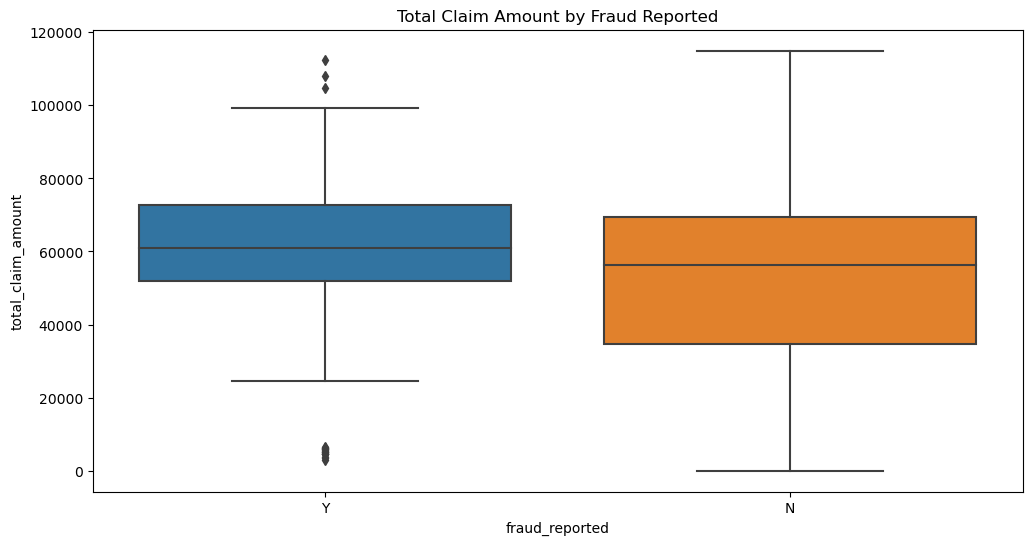

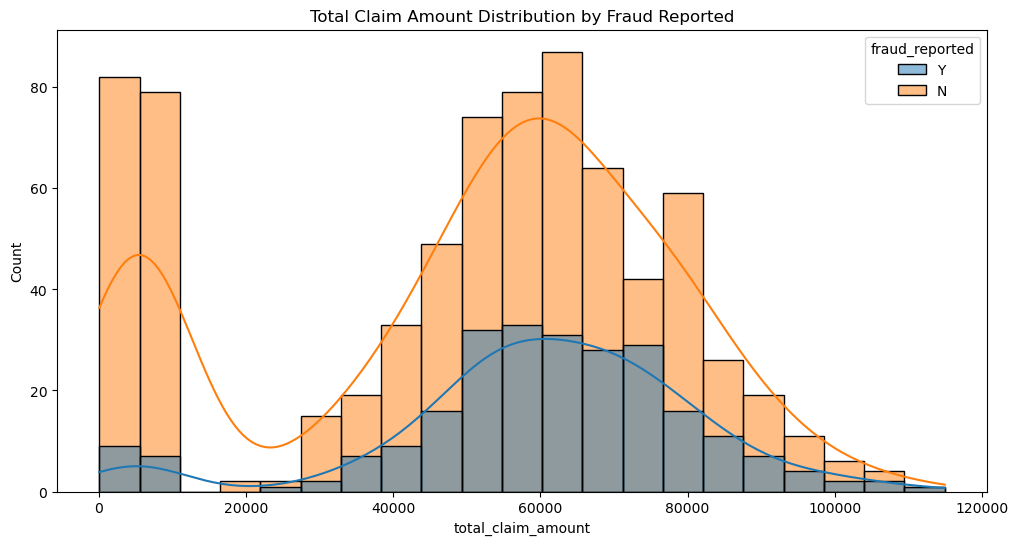

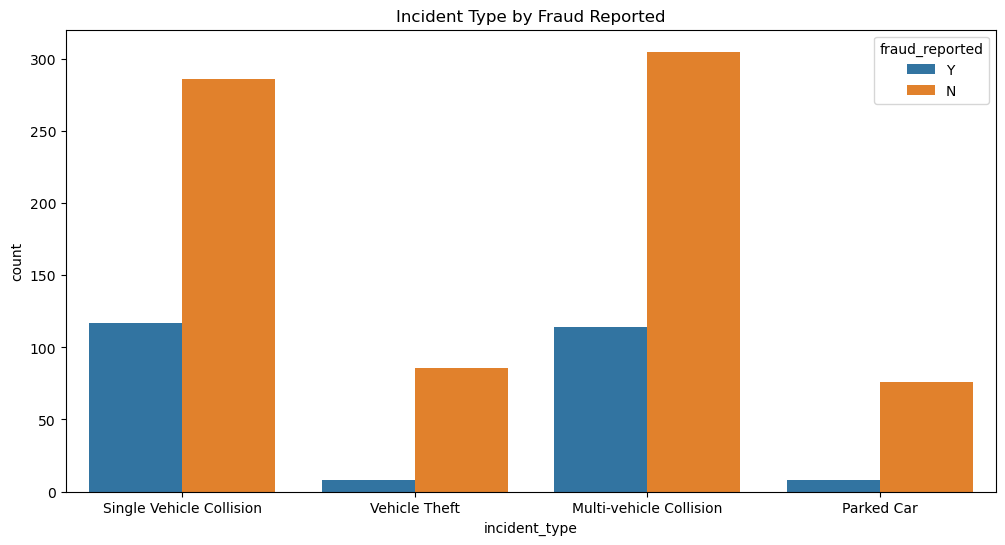

In [12]:
# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=df_insurance)
plt.title('Total Claim Amount by Fraud Reported')
plt.show()

# Histograms
plt.figure(figsize=(12, 6))
sns.histplot(data=df_insurance, x='total_claim_amount', hue='fraud_reported', kde=True)
plt.title('Total Claim Amount Distribution by Fraud Reported')
plt.show()

# Count plots for categorical features
plt.figure(figsize=(12, 6))
sns.countplot(x='incident_type', hue='fraud_reported', data=df_insurance)
plt.title('Incident Type by Fraud Reported')
plt.show()

In [15]:
#df_insurance.isnull().sum()

# 4. Data Engineering

# 5. Modelling

# 6. Model Performance

# 7. Model Explanations